In [6]:
# Water Quality Prediction – EE7209
#Problem Type:** Supervised Learning (Classification)  
#Target Variable:** Potability (1 = Safe, 0 = Unsafe)  
#Algorithms Used:** Logistic Regression, Decision Tree  
#Evaluation Metrics:** Accuracy, Recall, F1-score

In [13]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

from sklearn.pipeline import Pipeline #do automatically all imputer,scaler and model.
from sklearn.impute import SimpleImputer #handle missing value (mean,median,most_frequent)
from sklearn.preprocessing import StandardScaler #check range(mean is zero)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

In [15]:
df = pd.read_csv("water_potability.csv")

print("\nHEAD:")
print(df.head())



HEAD:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [19]:
print("SHAPE:\n", df.shape)
print("\nCOLUMNS:\n", df.columns)

print("\nDTYPES:")
print(df.dtypes)

print("\nMISSING VALUES:")
print(df.isna().sum())

print("\nDESCRIBE:")
print(df.describe())

print("\nINFO:")
df.info()

print("\nSAMPLE:")
print(df.sample(10))

SHAPE:
 (3276, 10)

COLUMNS:
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

DTYPES:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

MISSING VALUES:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

DESCRIBE:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       

In [26]:
x = df.drop(columns=["Potability"])
y = df["Potability"]

#x.head()
#y.head()

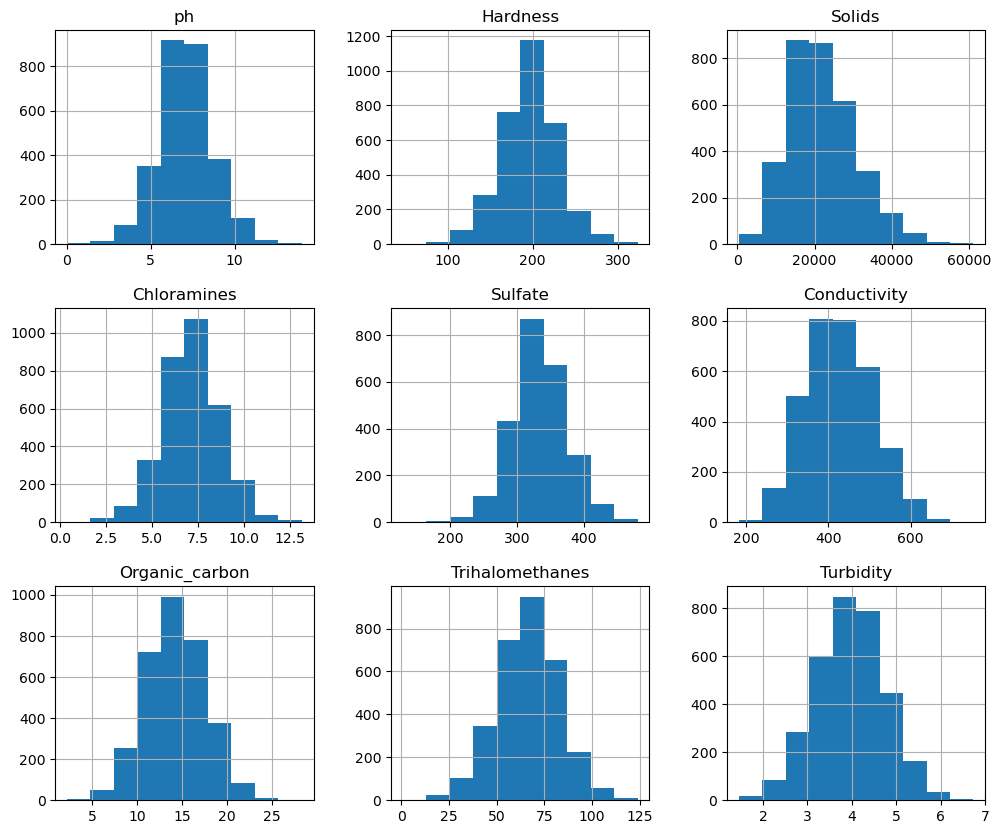

In [28]:
import matplotlib.pyplot as plt

x.hist(figsize=(12, 10)) #(width, height)
plt.show()


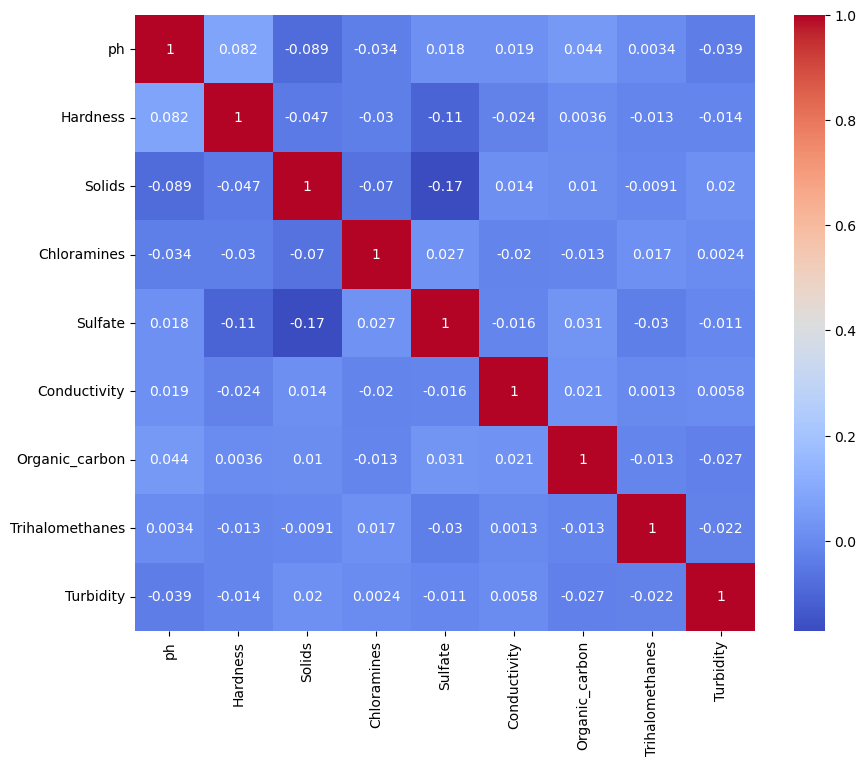

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(x.corr(), annot=True, cmap="coolwarm")
plt.show()


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, stratify=y, random_state=42
)

#random_state → same split every time
#stratify → same class balance

#X_train.head()
#y_test.head()

In [65]:
lr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")), #fill missing
    ("scaler", StandardScaler()), #scale data
    ("model", LogisticRegression(max_iter=1500,solver="liblinear", class_weight="balanced", random_state=42))
]) 

# class_weight - Both classes are equally important, even if one appears less(improve Accuracy, Recall (minority), F1-score,Real usefulness)

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)


In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
#print("Recall:", recall_score(y_test, y_pred_lr))
#print("F1-score:", f1_score(y_test, y_pred_lr))
#print(confusion_matrix(y_test, y_pred_lr))
#print(classification_report(y_test, y_pred_lr))


Accuracy: 0.5426829268292683


In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy": "accuracy", "recall": "recall", "f1": "f1"}

cross_validate(lr_pipe, x, y, cv=cv, scoring=scoring)
cross_validate(dt_pipe, x, y, cv=cv, scoring=scoring)


{'fit_time': array([0.11870885, 0.12155557, 0.1266768 , 0.10558844, 0.10494781]),
 'score_time': array([0.0161612 , 0.01534486, 0.01597881, 0.01455665, 0.01607728]),
 'test_accuracy': array([0.5945122 , 0.56335878, 0.60458015, 0.60916031, 0.58473282]),
 'test_recall': array([0.4921875 , 0.44705882, 0.4745098 , 0.44921875, 0.46484375]),
 'test_f1': array([0.48648649, 0.44357977, 0.48303393, 0.47325103, 0.46666667])}

In [68]:
!git add .

In [69]:
!git commit -m "check accuracy 0.5"

[main dd64701] check accuracy 0.5
 1 file changed, 54 insertions(+), 9 deletions(-)


In [70]:
!git push

To https://github.com/supun-pregeeth/water-quality-potability-ml.git
   e034567..dd64701  main -> main


In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
!git add .

In [ ]:
!!git commit -m "add f"